In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Inserciones

In [23]:
df = pd.read_csv("inserciones.csv")
print(df.head())

                         mapa         1         5        10        15  \
0             hashing_abierto  0.460487  2.506055  4.997312  7.804824   
1      hashing_cerrado_lineal  0.444168  2.146624  4.182609  6.266688   
2  hashing_cerrado_cuadratico  0.475831  2.144344  4.208583  6.474052   
3                         stl  0.392376  1.968238  4.077123  6.302986   

          20  
0  10.563856  
1   8.389377  
2   8.544172  
3   8.039996  


In [24]:
df_melted = df.melt(id_vars='mapa', var_name='insertions', value_name='time')
print(df_melted.head())
df_melted['insertions'] = df_melted['insertions'].astype(int)
print(df_melted.head())

                         mapa insertions      time
0             hashing_abierto          1  0.460487
1      hashing_cerrado_lineal          1  0.444168
2  hashing_cerrado_cuadratico          1  0.475831
3                         stl          1  0.392376
4             hashing_abierto          5  2.506055
                         mapa  insertions      time
0             hashing_abierto           1  0.460487
1      hashing_cerrado_lineal           1  0.444168
2  hashing_cerrado_cuadratico           1  0.475831
3                         stl           1  0.392376
4             hashing_abierto           5  2.506055


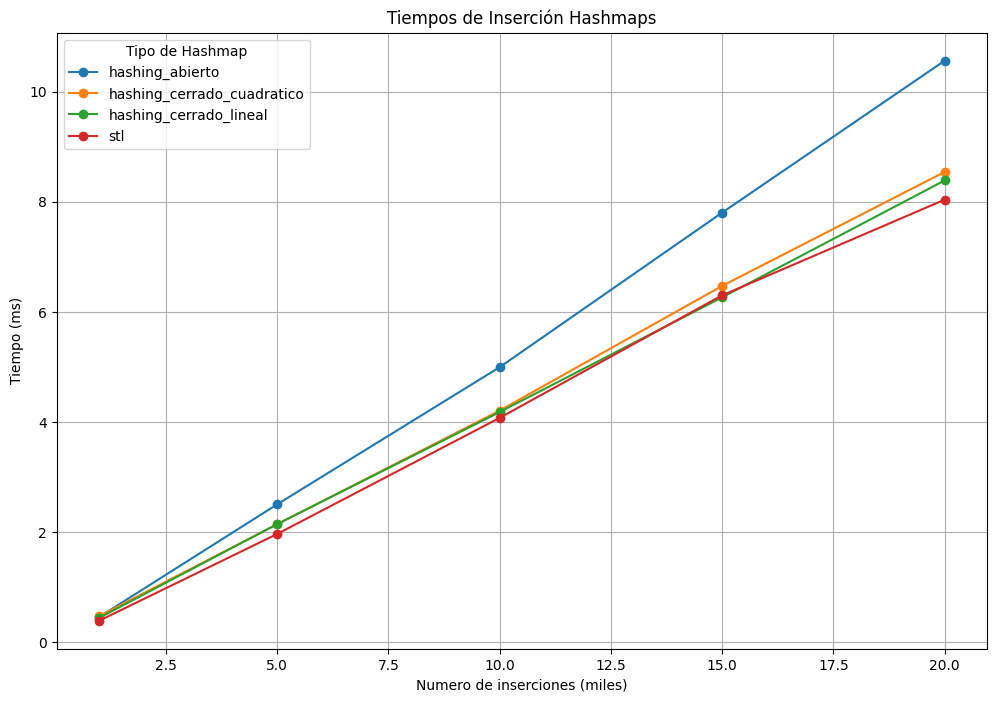

In [25]:
plt.figure(figsize=(12, 8))

for key, grp in df_melted.groupby(["mapa"]):
    plt.plot(grp["insertions"], grp["time"], marker='o', label=key[0])

plt.xlabel("Numero de inserciones (miles)")
plt.ylabel("Tiempo (ms)")
plt.title("Tiempos de Inserción Hashmaps")
plt.legend(title="Tipo de Hashmap")
plt.grid(True)
plt.show()


In [26]:
insertion_counts = ["1", "5", "10", "15", "20"]
num_insertion_counts = len(insertion_counts)
num_maps = len(df["mapa"])

# Create a numpy array for the bar positions
bar_width = 0.15
index = np.arange(num_insertion_counts)

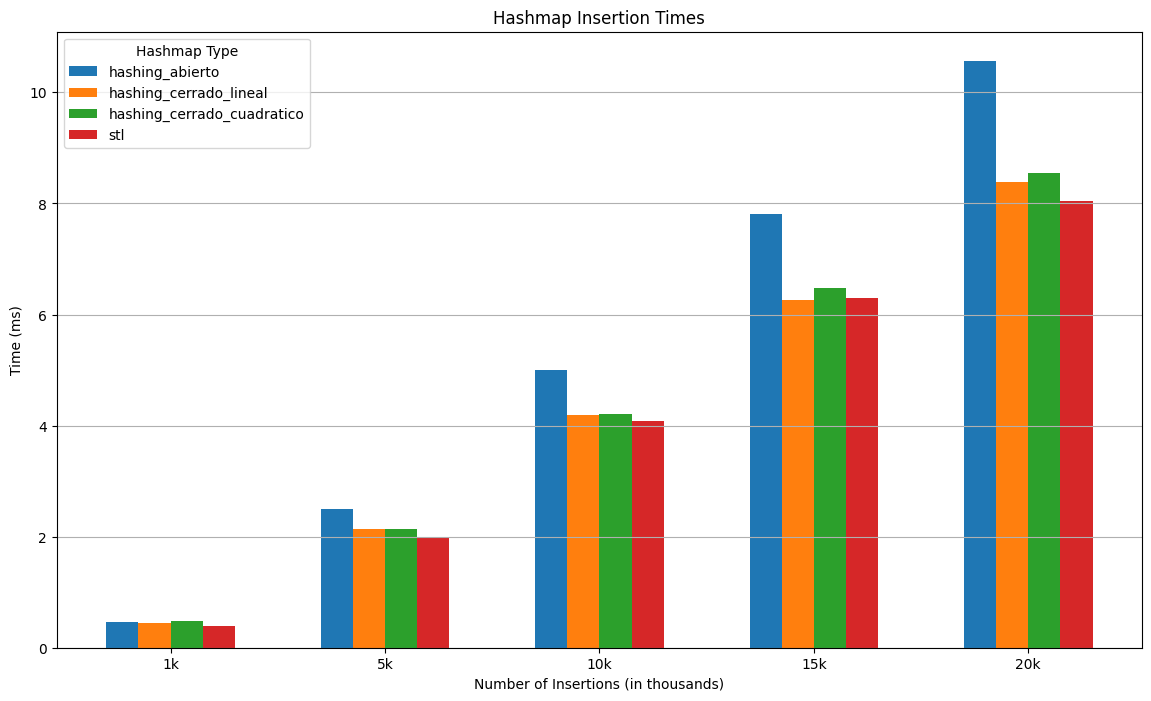

In [27]:
plt.figure(figsize=(14, 8))

for i, map_type in enumerate(df["mapa"]):
    plt.bar(index + i * bar_width, df[insertion_counts].iloc[i], bar_width, label=map_type)

# Customize the plot
plt.xlabel("Number of Insertions (in thousands)")
plt.ylabel("Time (ms)")
plt.title("Hashmap Insertion Times")
plt.xticks(index + bar_width * (num_maps - 1) / 2, ["1k", "5k", "10k", "15k", "20k"])
plt.legend(title="Hashmap Type")
plt.grid(axis="y")

# Display the plot
plt.show()

# Busquedas

In [28]:
df = pd.read_csv("busquedas.csv")
print(df.head())

                         mapa         1         5        10        15  \
0             hashing_abierto  0.446574  2.347466  4.750360  7.399214   
1      hashing_cerrado_lineal  0.214499  1.113061  2.226369  3.412302   
2  hashing_cerrado_cuadratico  0.326320  1.682959  3.258365  4.881905   
3                         stl  0.176002  0.977697  1.897689  2.939603   

          20  
0  10.447264  
1   4.539994  
2   6.596676  
3   4.146429  


In [29]:
df_melted = df.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
print(df_melted.head())
df_melted["busquedas"] = df_melted["busquedas"].astype(int)
print(df_melted.head())

                         mapa busquedas    tiempo
0             hashing_abierto         1  0.446574
1      hashing_cerrado_lineal         1  0.214499
2  hashing_cerrado_cuadratico         1  0.326320
3                         stl         1  0.176002
4             hashing_abierto         5  2.347466
                         mapa  busquedas    tiempo
0             hashing_abierto          1  0.446574
1      hashing_cerrado_lineal          1  0.214499
2  hashing_cerrado_cuadratico          1  0.326320
3                         stl          1  0.176002
4             hashing_abierto          5  2.347466


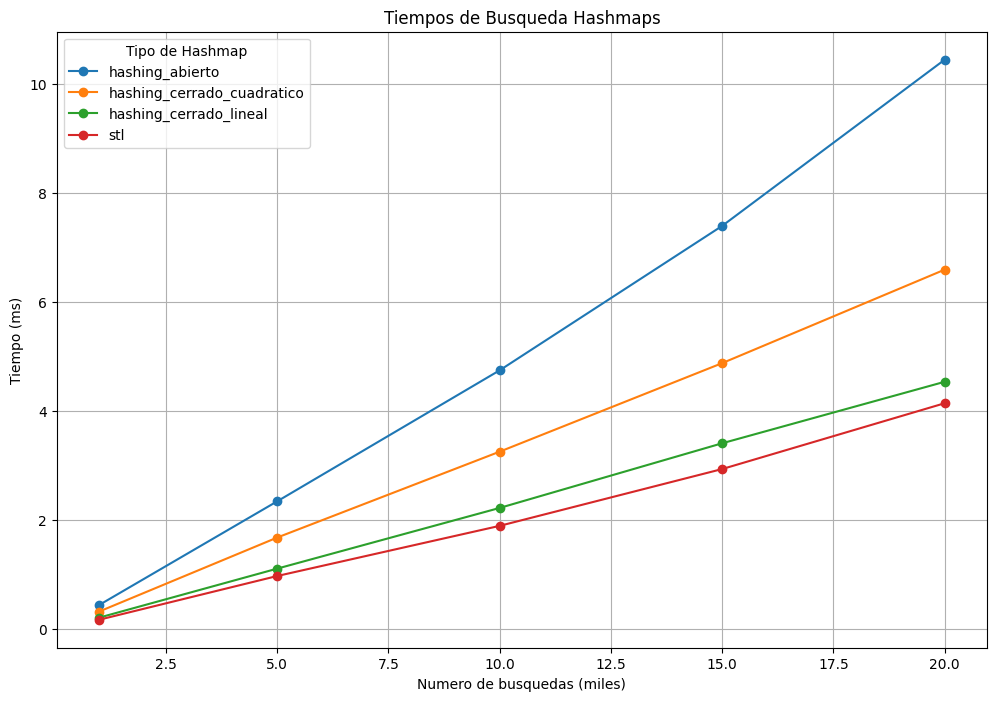

In [30]:
plt.figure(figsize=(12, 8))

for key, grp in df_melted.groupby(["mapa"]):
    plt.plot(grp["busquedas"], grp["tiempo"], marker='o', label=key[0])

plt.xlabel("Numero de busquedas (miles)")
plt.ylabel("Tiempo (ms)")
plt.title("Tiempos de Busqueda Hashmaps")
plt.legend(title="Tipo de Hashmap")
plt.grid(True)
plt.show()
